## 1. Import libraries and read the dfset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the dataset using read_csv from pandas
df = pd.read_csv('Assignment 1 Set 10 Dataset.csv')

## 2.Data Visualization and Exploration

In [4]:
#Printing first two rows for sanity check
print (df.head(2))

   id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0   1      CO     269         SFO       IAH          3    15     205      1
1   2      US    1558         PHX       CLT          3    15     222      1


In [5]:
#print the columns of the dataset
print (df.columns)

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay'],
      dtype='object')

There are 240264 delayed flights out of 539383 total flights (44.54%)


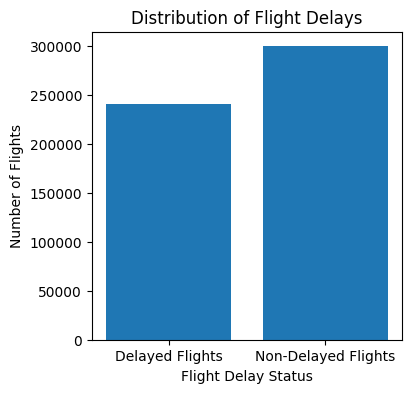

In [6]:
#Check for class imbalance (imbalance in the number of delayed flights vs non-delayed flights)
delayed_flights = len(df[df['Delay'] == 1])
total_flights = len(df)
percent_delayed = (delayed_flights / total_flights) * 100

print(f"There are {delayed_flights} delayed flights out of {total_flights} total flights ({percent_delayed:.2f}%)")

# Visualize class imbalance with a bar chart
plt.figure(figsize=(4, 4))
plt.bar(['Delayed Flights', 'Non-Delayed Flights'], [delayed_flights, total_flights - delayed_flights])
plt.xlabel('Flight Delay Status')
plt.ylabel('Number of Flights')
plt.title('Distribution of Flight Delays')
plt.show()


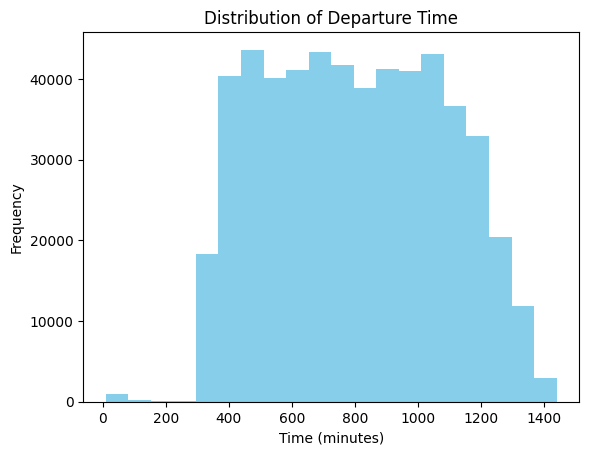

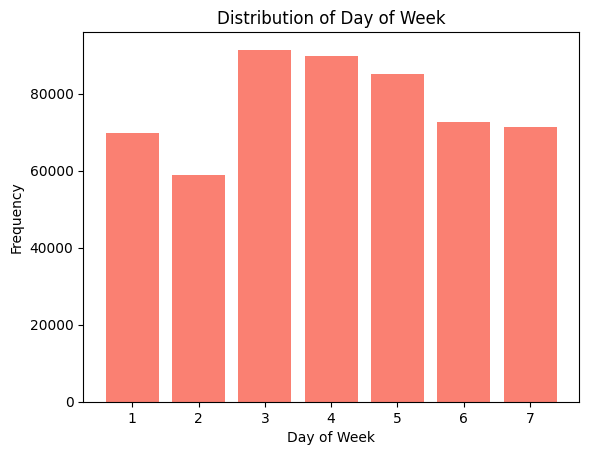

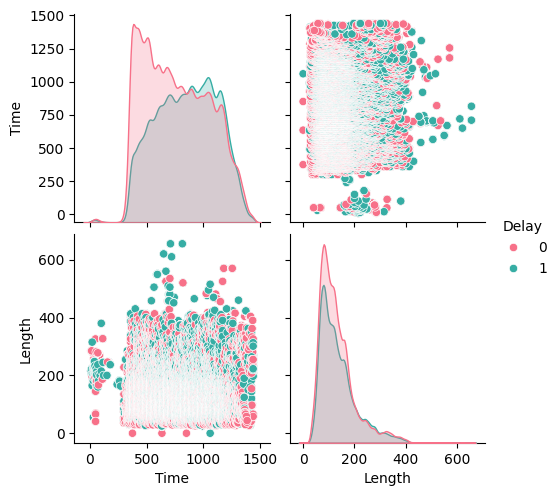

In [7]:
# Histogram for Time
plt.hist(df['Time'], bins=20, color='skyblue')
plt.title('Distribution of Departure Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Bar chart for DayOfWeek
plt.bar(df['DayOfWeek'].unique(), df['DayOfWeek'].value_counts(), color='salmon')
plt.title('Distribution of Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.show()


# Pairplot for numerical features
sns.pairplot(df[['Time', 'Length', 'Delay']], hue='Delay', palette='husl')
plt.show()


/var/folders/j7/99cfrl1n163gxzsb_pw54msc0000gp/T/ipykernel_86365/1197595831.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.countplot(y=df['Airline'], data = df,
/var/folders/j7/99cfrl1n163gxzsb_pw54msc0000gp/T/ipykernel_86365/1197595831.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_yticklabels(axis.get_yticklabels())


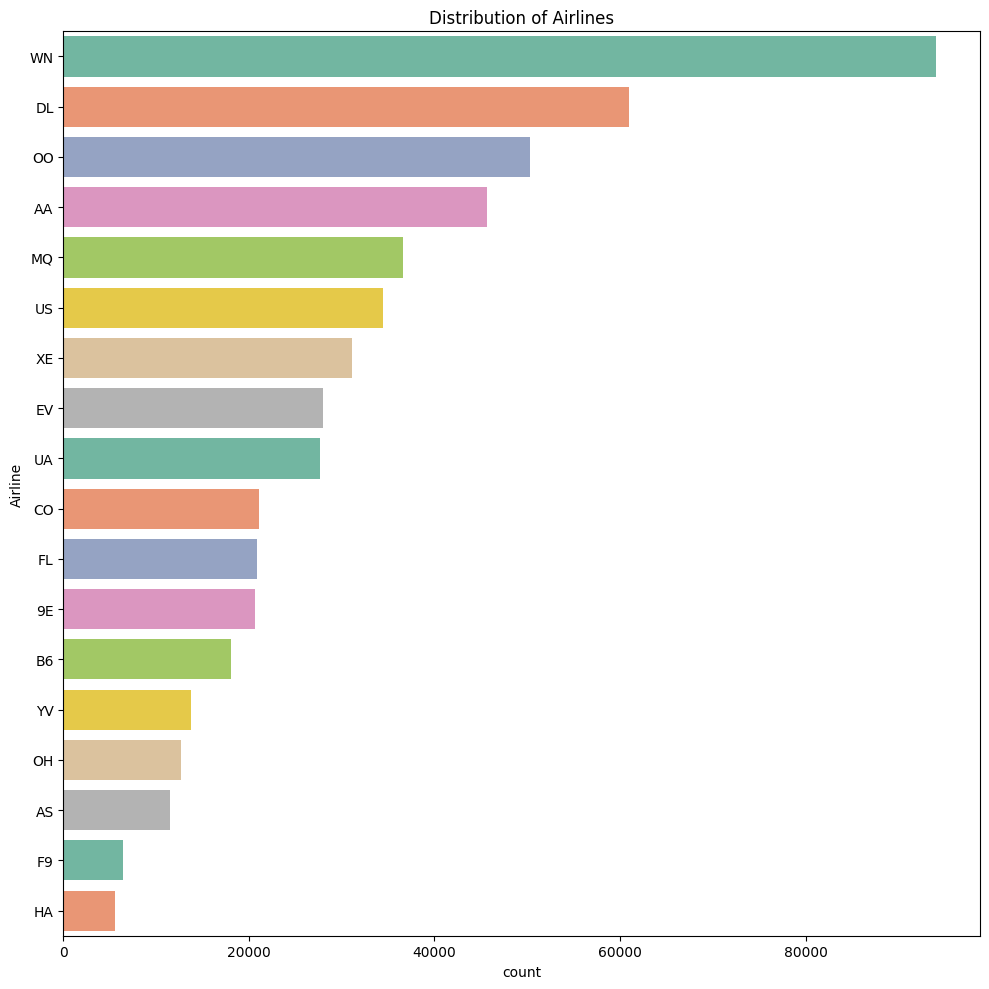

In [8]:
#plot the bar chart for the airlines
plt.figure(figsize=(10, 10))
axis = sns.countplot(y=df['Airline'], data = df,
              order=df['Airline'].value_counts().iloc[:].index,palette="Set2")
axis.set_yticklabels(axis.get_yticklabels())
plt.title('Distribution of Airlines')
plt.tight_layout()
plt.show()


From the above chart most of the flights belongs to the airlines WN

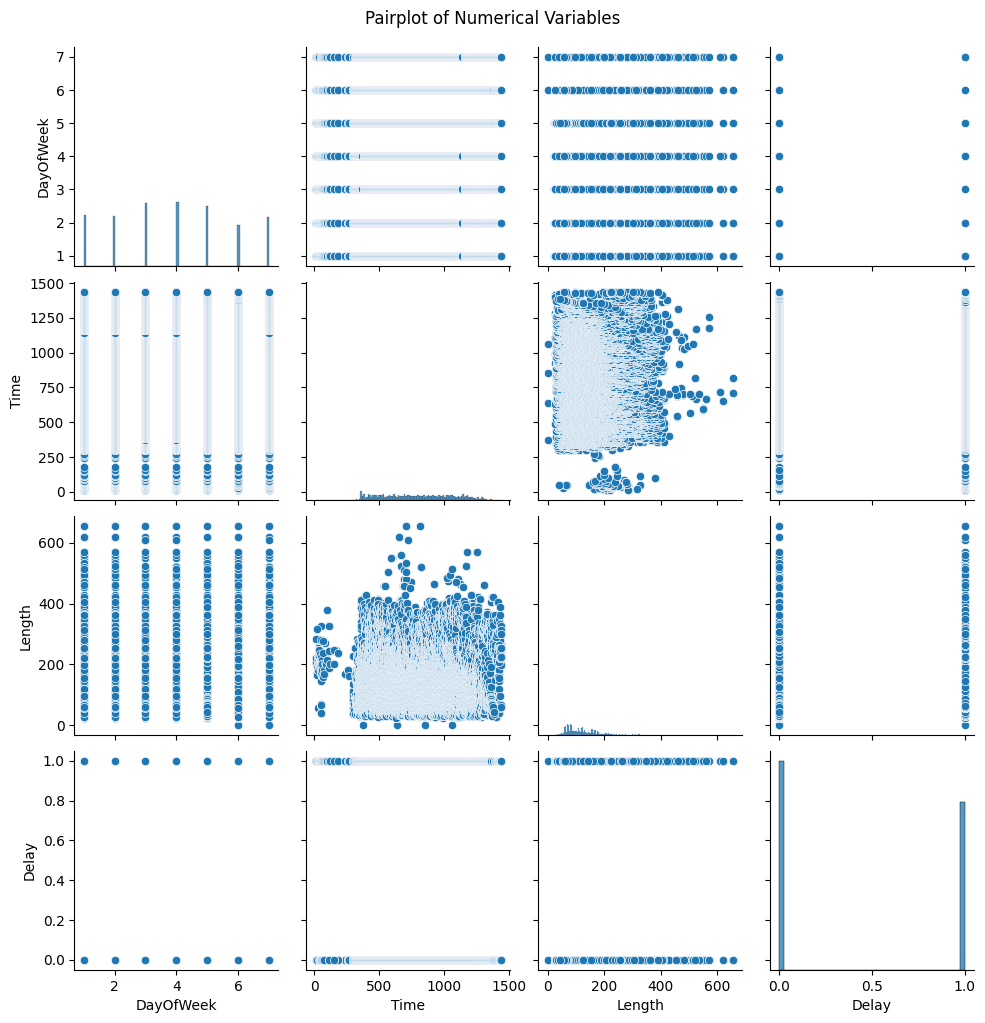

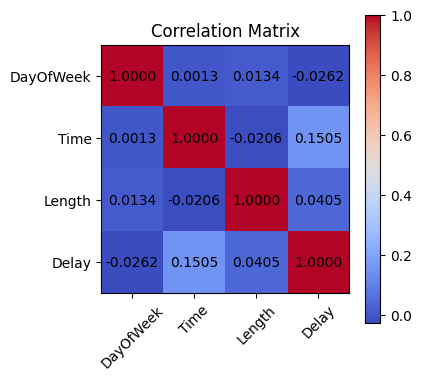

In [9]:
# Perform correlation analysis and create a correlation matrix
correlation_matrix = df[[ 'DayOfWeek', 'Time', 'Length', 'Delay']].corr()

sns.pairplot(df[[ 'DayOfWeek', 'Time', 'Length', 'Delay']])
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()


# g. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(4, 4))
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()

 #Add labels for each cell (optional) 
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(i, j, f"{correlation_matrix.iloc[i, j]:.4f}", ha="center", va='center')

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

None of the features have corrleation not greater than 0.5, this seems all the features are independent and none of the features are impacting the others.

## 3.Data Pre-processing and cleaning

In [10]:
#analyzing missing values
#print the number of null values in the dataset
print (df.isna().sum())

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64


There are no missing / null values in the dataset

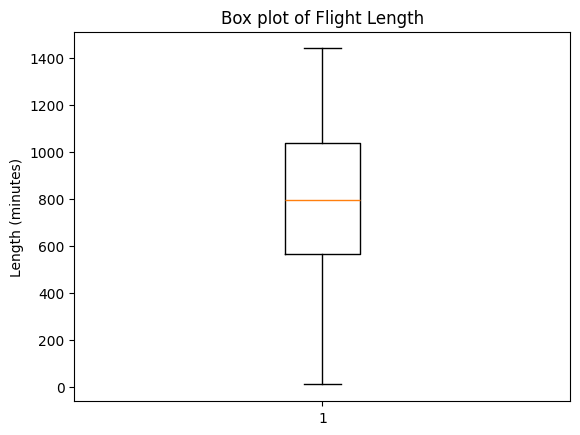

In [11]:
# handling outliers
# Box plot for Length
plt.boxplot(df['Time'])
plt.title('Box plot of Flight Length')
plt.ylabel('Length (minutes)')
plt.show()


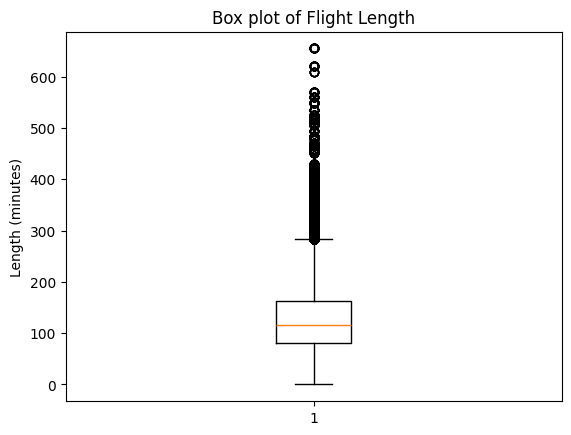

In [12]:

# Box plot for Length
plt.boxplot(df['Length'])
plt.title('Box plot of Flight Length')
plt.ylabel('Length (minutes)')
plt.show()

There are no outliers present in the departure time, there are lot of outliers detected in the flight lenths. 
We can replace the outliers with the median or do z-score calcuation with threshold 3.

In [14]:
# IQR method for outlier detection
Q1 = df['Length'].quantile(0.25)
Q3 = df['Length'].quantile(0.75)
IQR = Q3 - Q1

# Find outliers based on IQR
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = df[(df['Length'] < lower_bound) | (df['Length'] > upper_bound)]

#findout the % of outliers in the dfset
len(outliers) * 100/len(df)

4.755433523118081

In [15]:
# Calculate Z-scores
mean_length = df['Length'].mean()
std_dev_length = df['Length'].std()
df['Z-score'] = (df['Length'] - mean_length) / std_dev_length

# Define threshold  +- 3 standard deviations
threshold = 3

# Find outliers based on Z-scores
outliers = df[df['Z-score'].abs() > threshold]
# Drop outliers from the original df (assuming you want to modify the df)
df_filtered = df.drop(outliers.index)

# Print outliers (optional)
print("Outliers in the Length column:")
print(outliers.head())

# Print the df without outliers (optional)
print("\n data frame after removing outliers:")
print(df_filtered.head())


Outliers in the Length column:
      id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  \
23    24      HA      17         LAS       HNL          3   100     380   
433  434      UA     303         JFK       SFO          3   360     404   
677  678      UA     893         BOS       SFO          3   370     410   
682  683      US     506         BOS       PHX          3   370     364   
808  809      UA     185         PHL       SFO          3   377     389   

     Delay   Z-score  
23       1  3.534064  
433      0  3.876349  
677      0  3.961920  
682      0  3.305874  
808      0  3.662420  

 data frame after removing outliers:
   id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay  \
0   1      CO     269         SFO       IAH          3    15     205      1   
1   2      US    1558         PHX       CLT          3    15     222      1   
2   3      AA    2400         LAX       DFW          3    20     165      1   
3   4      AA    2466     

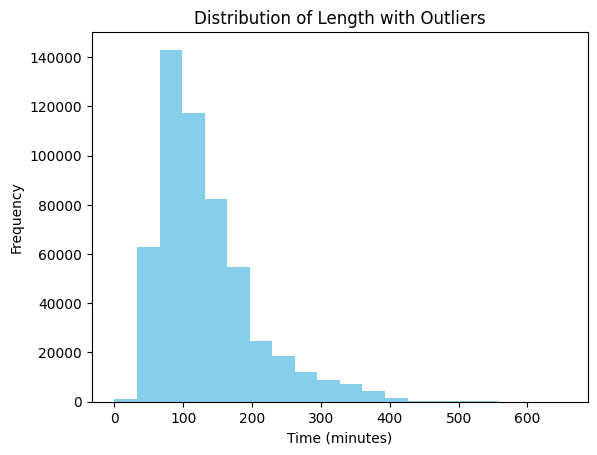

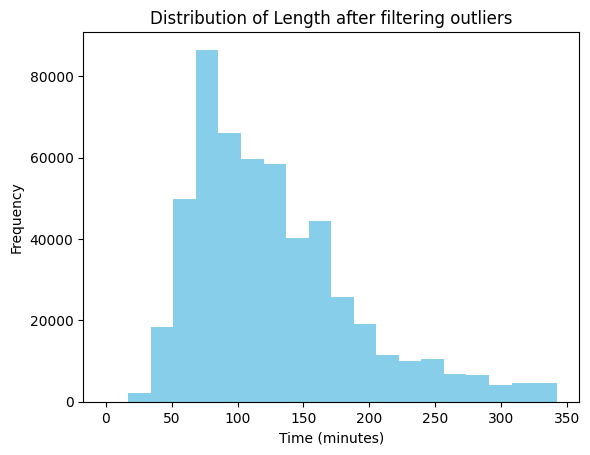

In [16]:
# Histogram for Time
plt.hist(df['Length'], bins=20, color='skyblue')
plt.title('Distribution of Length with Outliers')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.show()

plt.hist(df_filtered['Length'], bins=20, color='skyblue')
plt.title('Distribution of Length after filtering outliers')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.show()


After removing the outliers the distribution looks normal distribution with right skewed (positive skewness)

In [18]:
#convert/encode the Flight column with one hot encoding
#assign a numerica value for each of the catageorical value
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data
one_hot_encoded = encoder.fit_transform(df[['Airline']])
one_hot_df = pd.concat([pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(['Airline'])), df], axis = 1)

one_hot_df.drop(axis=1, columns=['Airline','id', 'Z-score'], inplace= True)
one_hot_df

,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,Airline_FL,Airline_HA,...,Airline_WN,Airline_XE,Airline_YV,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,269,SFO,IAH,3,15,205,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1558,PHX,CLT,3,15,222,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2400,LAX,DFW,3,20,165,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2466,SFO,DFW,3,20,195,1
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539378,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,178,OGG,SNA,5,1439,326,0
539379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,398,SEA,ATL,5,1439,305,0
539380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,609,SFO,MKE,5,1439,255,0
539381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,78,HNL,SFO,5,1439,313,1


In [19]:
#Lable encode the columns 'Flight','AirportFrom','Airportto'
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()
labeled_df = one_hot_df.copy()
# Fit and transform the data
for c in ['Flight','AirportFrom','AirportTo']  :
    labeled_df[c] = label_encoder.fit_transform(df[c])

# Add the encoded labels to the DataFrame
print (labeled_df[['Flight','AirportFrom','AirportTo']])


        Flight  AirportFrom  AirportTo
0          267          253        135
1         1553          217         60
2         2395          154         80
3         2461          253         80
4          106           14        252
...        ...          ...        ...
539378     176          203        264
539379     396          252         16
539380     607          253        184
539381      76          128        253
539382    1437          154        216

[539383 rows x 3 columns]


After removing the outliers the distribution looks normal distribution with right skewed (positive skewness)

In [20]:
#Scale the features Time and length
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_features = scaler.fit_transform(df[['Time','Length']])

# Convert the scaled features to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=['Time','Length'])

scaled_df = pd.concat([labeled_df, scaled_df], axis= 1)


## 4. Model Building

In [22]:
#split the data set into training and testing 

#use the train_test_split function from sklearn for splitting the dataset
from sklearn.model_selection import train_test_split
X = scaled_df.drop(columns=['Delay'],axis= 1)
y = scaled_df['Delay']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#make sure all the features are scaled and converted accordingly 
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 431506 entries, 498081 to 121958
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Airline_9E   431506 non-null  float64
 1   Airline_AA   431506 non-null  float64
 2   Airline_AS   431506 non-null  float64
 3   Airline_B6   431506 non-null  float64
 4   Airline_CO   431506 non-null  float64
 5   Airline_DL   431506 non-null  float64
 6   Airline_EV   431506 non-null  float64
 7   Airline_F9   431506 non-null  float64
 8   Airline_FL   431506 non-null  float64
 9   Airline_HA   431506 non-null  float64
 10  Airline_MQ   431506 non-null  float64
 11  Airline_OH   431506 non-null  float64
 12  Airline_OO   431506 non-null  float64
 13  Airline_UA   431506 non-null  float64
 14  Airline_US   431506 non-null  float64
 15  Airline_WN   431506 non-null  float64
 16  Airline_XE   431506 non-null  float64
 17  Airline_YV   431506 non-null  float64
 18  Flight       431506 non-

/Users/adityanandanreddy.sanivarapu/anaconda3/envs/mlassign/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Precision: 0.650360472577662
Recall: 0.3589732905537731
F1-score: 0.4626062208857446
Accuracy: 0.628919973673721
ROC AUC Score: 0.6021389941805088


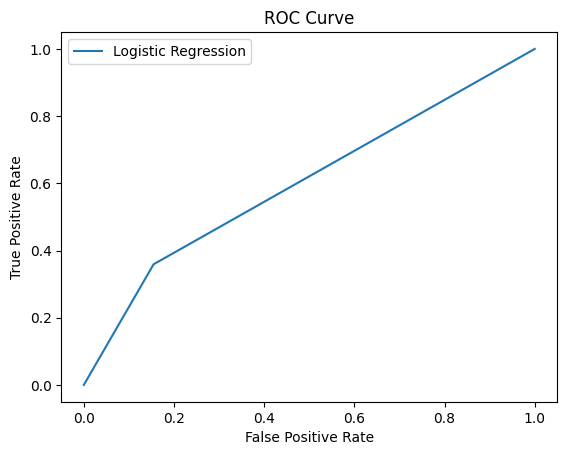

In [23]:
#Build the logistic regeressionm  model

#import the LogisticRegression library from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt


# Instantiate the Logistic Regression model
lr_model = LogisticRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = lr_model.predict(X_test)


# Make predictions on the test data
lr_predictions = lr_model.predict(X_test)

# Calculate evaluation metrics
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_roc_auc = roc_auc_score(y_test, lr_predictions)

print("Logistic Regression Metrics:")
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-score:", lr_f1)
print("Accuracy:", lr_accuracy)
print("ROC AUC Score:", lr_roc_auc)

# ROC Curve for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_predictions)
plt.figure()
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



Precision (0.65): Out of all the positive predictions your model made, 65% were actually correct. In other words, for every 100 positive predictions, 65 were true positives and 35 were false positives.

Recall (0.36): Of all the actual positive cases in your data, the model identified only 36%. This means the model missed a significant portion of the positive cases (64%).

F1-score (0.46): This combines precision and recall, but it may not be the most informative metric here because the imbalance between precision and recall is substantial.

Accuracy (0.63): Overall, 63% of the predictions were correct. However, accuracy can be misleading in imbalanced datasets, where the model might simply predict the majority class most of the time.

ROC AUC Score (0.60): This score is around 0.5, which is not much better than random guessing. It suggests the model isn't very good at distinguishing between positive and negative cases.

**Conclusion**
The model is devoleped and acheived moderate performance has to be improved with different hyperparameters or develop a new model.

Decision Tree Metrics:
Precision: 0.5736424404776806
Recall: 0.4773740572523855
F1-score: 0.5210993734435587
Accuracy: 0.6096016759828323
ROC AUC Score: 0.59648358501491


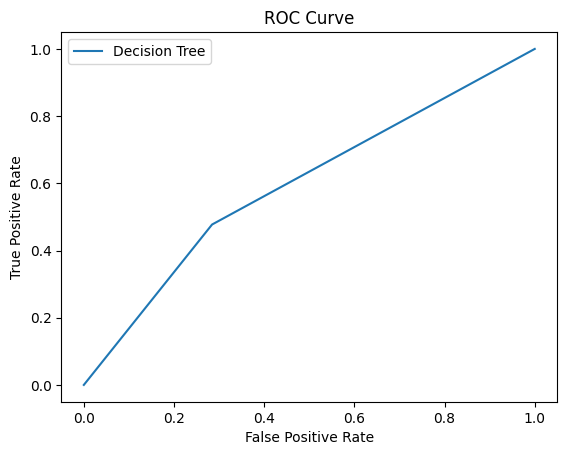

In [24]:
#Build the Decision Tree Classifier  model

#import the DecisionTreeClassifier library from sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Instantiate the Decision Tree model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = dt_model.predict(X_test)

# Make predictions on the test data
dt_predictions = dt_model.predict(X_test)

# Calculate evaluation metrics
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_roc_auc = roc_auc_score(y_test, dt_predictions)

print("Decision Tree Metrics:")
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)
print("Accuracy:", dt_accuracy)
print("ROC AUC Score:", dt_roc_auc)

# ROC Curve for Decision Tree
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_predictions)
plt.figure()
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



Precision (0.57): Out of all the positive predictions your model made, 57% were actually correct. This means for every 100 positive predictions, 57 were true positives and 43 were false positives.

Recall (0.48): Of all the actual positive cases in your data, the model identified only 48%. This means the model missed a significant portion of the positive cases (52%).

F1-score (0.52): This combines precision and recall, but it might not be the most informative metric here because the difference between precision and recall is substantial.

Accuracy (0.61): Overall, 61% of the predictions were correct. However, accuracy can be misleading in imbalanced datasets, where the model might simply predict the majority class most of the time.

ROC AUC Score (0.59): A score around 0.5 is not much better than random guessing. It suggests the model isn't very good at distinguishing between positive and negative cases.

**Conclusion**

Decision tree classifier performed better than logistic regresion. The F1-score and ROC AUC score are both around 0.5, indicating there's room for improvement in the model's ability to classify correctly. Tuning the hyperparameters of the decision tree (e.g., minimum samples per leaf) to see if you can improve the performance.

KNN Metrics:
Accuracy: 0.6426485719847604
Precision: 0.6073929253432755
Recall: 0.5566481936747365
F1-score: 0.5809144869871502
ROC AUC Score: 0.6341166117424268


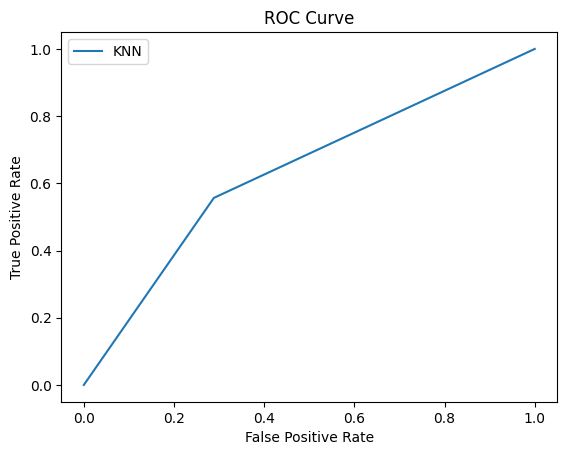

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNN model with a specified number of neighbors (e.g., n_neighbors=5)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
knn_predictions = knn_model.predict(X_test)

# Calculate evaluation metrics
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
knn_roc_auc = roc_auc_score(y_test, knn_predictions)

print("KNN Metrics:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-score:", knn_f1)
print("ROC AUC Score:", knn_roc_auc)

# ROC Curve for KNN
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_predictions)
plt.figure()
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Accuracy (0.64): This is the proportion of correct predictions made by the model (64%).

Precision (0.61): Out of all positive predictions, 61% were actually correct.

Recall (0.56): The model identified 56% of the actual positive cases in your data.

F1-score (0.58): This combines precision and recall, but the difference between them might suggest focusing on improving a specific metric.

ROC AUC Score (0.63): This score is slightly better than random guessing (0.5), but there's room for improvement in distinguishing positive and negative cases.

**Conclusion**

The performance of the model is moderate. The metrics suggest the KNN model is performing around the same level as the decision tree, with some room for improvement.

In [26]:
from sklearn.svm import SVC


# Instantiate the SVM model with default parameters
svm_model = SVC()

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
svm_predictions = svm_model.predict(X_test)

# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
svm_roc_auc = roc_auc_score(y_test, svm_predictions)

print("SVM Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)
print("ROC AUC Score:", svm_roc_auc)

# ROC Curve for SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_predictions)
plt.figure


SVM Metrics:
Accuracy: 0.5800865800865801
Precision: 0.5628229598249616
Recall: 0.25188549522896786
F1-score: 0.34801882583226584
ROC AUC Score: 0.5475262743934882


<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

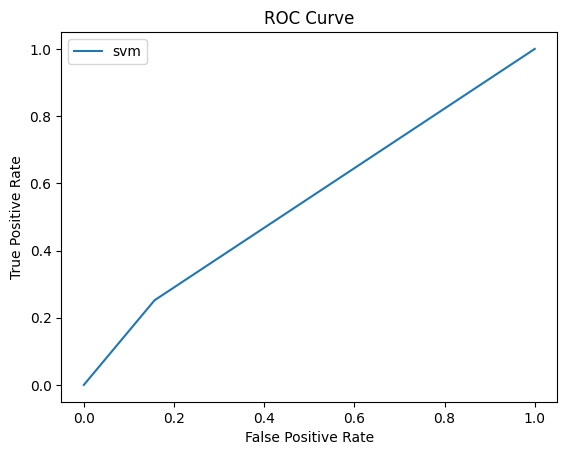

In [35]:
# ROC Curve for SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_predictions)
plt.figure()
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='svm')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Accuracy (0.58): This is the proportion of correct predictions made by the model (around 58%).

Precision (0.56): Out of all positive predictions, 56% were actually correct.

Recall (0.25): The model identified only 25% of the actual positive cases in your data. This is a significant drop compared to the other models.

F1-score (0.35): This combines precision and recall, but the very low recall suggests a priority for improvement.

ROC AUC Score (0.55): This score is barely better than random guessing (0.5), indicating the model struggles to distinguish between positive and negative cases.

**Conclusion**

The low recall and ROC AUC score suggest the SVM model might not be well-suited.

Naive Bayes Metrics:
Accuracy: 0.6029552175162454
Precision: 0.5454737509242632
Recall: 0.6455268969540398
F1-score: 0.5912977099236641
ROC AUC Score: 0.607178685872434


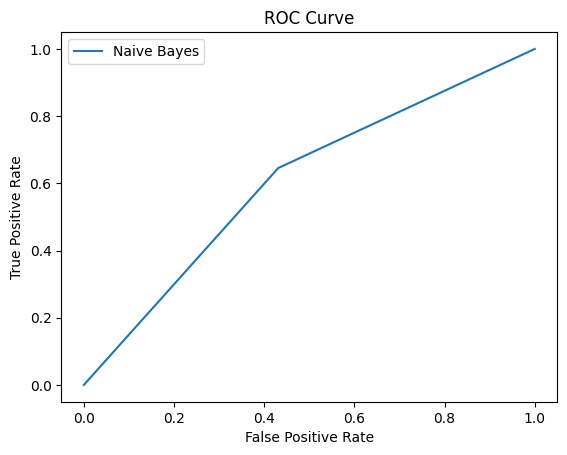

In [36]:
from sklearn.naive_bayes import GaussianNB

# Instantiate the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model to the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test data
nb_predictions = nb_model.predict(X_test)

# Calculate evaluation metrics
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)
nb_roc_auc = roc_auc_score(y_test, nb_predictions)

print("Naive Bayes Metrics:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1-score:", nb_f1)
print("ROC AUC Score:", nb_roc_auc)

# ROC Curve for Naive Bayes
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_predictions)
plt.figure()
plt.plot(nb_fpr, nb_tpr, linestyle='-', label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Accuracy (0.60): Overall, 60% of the predictions were correct.

Precision (0.55): Out of all the positive predictions your model made, 55% were actually correct.

Recall (0.64): Of all the actual positive cases in your data, the model identified 64%.

F1-score (0.59): This combines precision and recall, and in this case, it reflects the slight imbalance between them.

ROC AUC Score (0.61): A score slightly above 0.5 indicates the model's ability to distinguish between positive and negative cases is better than random guessing, but there's room for improvement.

**Conclusion**

Compared to the models knn, svm, logstic regression and decision tree this model has better performance. 

Random Forest Metrics:
Accuracy: 0.6207439954763295
Precision: 0.5759687761360468
Recall: 0.5595649818742447
F1-score: 0.5676483953122193
ROC AUC Score: 0.6146745232021903


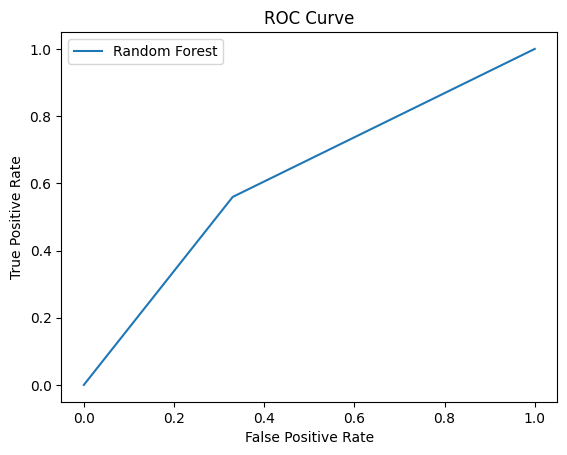

In [37]:
from sklearn.ensemble import RandomForestClassifier


# Instantiate the Random Forest model with default parameters
rf_model = RandomForestClassifier()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test)

# Calculate evaluation metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_predictions)

print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("ROC AUC Score:", rf_roc_auc)

# ROC Curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predictions)
plt.figure()
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Accuracy (0.62): Overall, 62% of the predictions were correct.

Precision (0.58): Out of all the positive predictions your model made, 58% were actually correct.

Recall (0.56): Of all the actual positive cases in your data, the model identified 56%.

F1-score (0.57): This combines precision and recall, and in this case, it reflects the slight imbalance between them.

ROC AUC Score (0.61): A score slightly above 0.5 indicates the model's ability to distinguish between positive and negative cases is better than random guessing, but there's room for improvement.

**Conclusion**

There is slightly lower recall compared to precision might suggest a slight imbalance in the dataset, but it's not as significant as in previous models.

/Users/adityanandanreddy.sanivarapu/anaconda3/envs/mlassign/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Metrics:
Accuracy: 0.6437887594204511
Precision: 0.6346397321554174
Recall: 0.4699570815450644
F1-score: 0.5400222645168241
ROC AUC Score: 0.6265431961608988


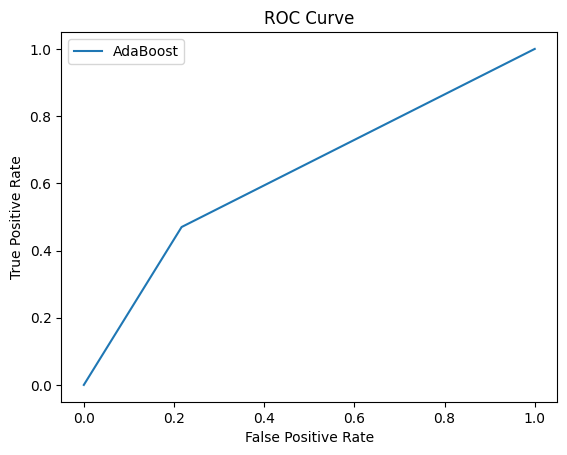

In [30]:
from sklearn.ensemble import AdaBoostClassifier

# Instantiate the AdaBoost model with default parameters
adaboost_model = AdaBoostClassifier()

# Fit the model to the training data
adaboost_model.fit(X_train, y_train)

# Make predictions on the test data
adaboost_predictions = adaboost_model.predict(X_test)

# Calculate evaluation metrics
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
adaboost_precision = precision_score(y_test, adaboost_predictions)
adaboost_recall = recall_score(y_test, adaboost_predictions)
adaboost_f1 = f1_score(y_test, adaboost_predictions)
adaboost_roc_auc = roc_auc_score(y_test, adaboost_predictions)

print("AdaBoost Metrics:")
print("Accuracy:", adaboost_accuracy)
print("Precision:", adaboost_precision)
print("Recall:", adaboost_recall)
print("F1-score:", adaboost_f1)
print("ROC AUC Score:", adaboost_roc_auc)

# ROC Curve for AdaBoost
adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_predictions)
plt.figure()
plt.plot(adaboost_fpr, adaboost_tpr, linestyle='-', label='AdaBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Accuracy (0.64): Overall, 64% of the predictions were correct.

Precision (0.63): Out of all the positive predictions your model made, 63% were actually correct.

Recall (0.47): Of all the actual positive cases in your data, the model identified only 47%. This is a lower recall compared to precision, suggesting the model might miss a significant portion of positive cases.

F1-score (0.54): This combines precision and recall, and the lower score reflects the imbalance between them.

ROC AUC Score (0.63): A score slightly above 0.5 indicates the model's ability to distinguish between positive and negative cases is better than random guessing, but there's room for improvement.

**Conclusion**

The recall and F1-score are low for this model, this indicates that the model is average performed in predicting the labels.

| Model               | Accuracy | Precision | Recall | F1-score | ROC AUC Score | Potential Issues |
|--------------------|----------|-----------|--------|----------|-------------|---------------|
| Decision Tree       | 0.61     | 0.57      | 0.48   | 0.52     | 0.59          | Potential imbalance |
| KNN                 | 0.64     | 0.61      | 0.56   | 0.58     | 0.63          | Potential imbalance |
| Logistic Regression | 0.63     | 0.65      | 0.36   | 0.46     | 0.6           | Potential imbalance, low recall |
| SVM                 | 0.58     | 0.56      | 0.25   | 0.35     | 0.55          | Low recall, ROC AUC score suggests difficulty distinguishing classes |
| Naive Bayes         | 0.6      | 0.55      | 0.64   | 0.59     | 0.61          | Average performance |
| Random Forest       | 0.62     | 0.58      | 0.56   | 0.57     | 0.61          | Average performance |
| AdaBoost            | 0.64     | 0.63      | 0.47   | 0.54     | 0.63          | Average performance, lower recall |


Overall KNN or Random Forest could be better options

In [31]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Define the scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Define parameter grids for each model
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'penalty': ['l1', 'l2']}
param_grid_dt = {'max_depth': [None, 10, 20, 30, 40],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                  'kernel': ['rbf', 'linear']}
param_grid_navieBayes = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5], 
                         'alpha': [0.1, 0.5, 1.0, 1.5, 2.0] }
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11],
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2]}
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
param_grid_adaboost = {'n_estimators': [50, 100, 200],
                       'learning_rate': [0.01, 0.1, 1.0]}


# List of tuples containing the model and its corresponding parameter grid
models = [
    (LogisticRegression(), param_grid_lr),
    (DecisionTreeClassifier(), param_grid_dt),
    (KNeighborsClassifier(), param_grid_knn),
    (RandomForestClassifier(), param_grid_rf),
    (AdaBoostClassifier(), param_grid_adaboost),
    (GaussianNB(),param_grid_navieBayes),
    (SVC(), param_grid_svm)
]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [33]:
# Perform grid search for each model
for model, param_grid in models:
    print("Tuning hyperparameters for:", model.__class__.__name__)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best estimator
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_
    
    # Make predictions on the test set
    y_pred = best_estimator.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Print the evaluation metrics
    print("---------------------------------------")
    print("Best Parameters:", best_params)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("ROC AUC Score:", roc_auc)
    
    
   

---------------------------------------
Tuning hyperparameters for: LogisticRegression
Best Parameters: {'C': 0.001, 'penalty': 'l2'}
Accuracy: 0.6290775605550766
Precision: 0.6509034550540561
Recall: 0.35874411433809744
F1-score: 0.4625530543168753
ROC AUC Score: 0.6022582109124311
---------------------------------------
Tuning hyperparameters for: DecisionTreeClassifier
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.6467272912669059
Precision: 0.6730365392692146
Recall: 0.40064169340389183
F1-score: 0.5022854904009403
ROC AUC Score: 0.6223135319505305
---------------------------------------
Tuning hyperparameters for: KNeighborsClassifier
Best Parameters: {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.6542358426726735
Precision: 0.629271593600464
Recall: 0.5424809367056961
F1-score: 0.5826620121732904
ROC AUC Score: 0.643148816855662
---------------------------------------
Tuning hyperparameters for: RandomForestClassifie

**Overall Analysis:**

* KNN achieved the highest overall accuracy (0.654) with a decent balance between precision and recall.
* Decision Tree and AdaBoost also showed good performance.
* Logistic Regression and SVM had lower overall performance, especially regarding recall (detecting flight delays).
* GaussianNB achieved the highest recall (0.646) but might have more false positives (predicting delays when there are none).

**Choosing the Best Model:**

The best model choice depends on specific needs and priorities. Here are some considerations:

* If high accuracy is most important: We can choose KNN here.
* If correctly identifying flight delays (high recall) is crucial: GaussianNB or Decision Tree could be better options.


Overall KNN or Decision tree could be better options
